In [126]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import re
import six

#### Helper para salvar graficos

In [127]:
def autolabel(rects, xpos='center', ax=None):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

#### Captura paths de cada ano:

In [128]:
local_raiz = 'database/'
locais_anos = list(Path(local_raiz).glob('*'))

#### Listas para armazenar os csvs especificos de cada ano:

In [129]:
processos_anos = []
andamentos_anos = []
assuntos_anos = []

In [130]:
for local in locais_anos:
    processos_anos.append(list(Path(local).glob('*_recife.csv'))[0])
    andamentos_anos.append(list(Path(local).glob('*_andamentos.csv'))[0])
    assuntos_anos.append(list(Path(local).glob('*_assuntos.csv'))[0])

df_processos = [pd.read_csv(str(processo)) for processo in processos_anos]
df_andamentos = [pd.read_csv(str(andamento)) for andamento in andamentos_anos]
df_assuntos = [pd.read_csv(str(assunto)) for assunto in assuntos_anos]

#### Criação de DataFrames

In [131]:
df_processos_totais = pd.concat(df_processos)
df_andamentos_totais = pd.concat(df_andamentos)
df_assuntos_totais = pd.concat(df_assuntos)

### Frequencia de processos por ano

Os valores foram obtidos realizando uma pesquisa no banco, para fac

In [132]:
anos_frequencia = pd.DataFrame({
        'Ano': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
        'Proc_ano': [16558, 17460, 17302, 18466, 17366, 11605, 12519, 15075],
        'Proc_vcm': [235, 334, 286, 407, 972, 1111, 2169, 3786]
})

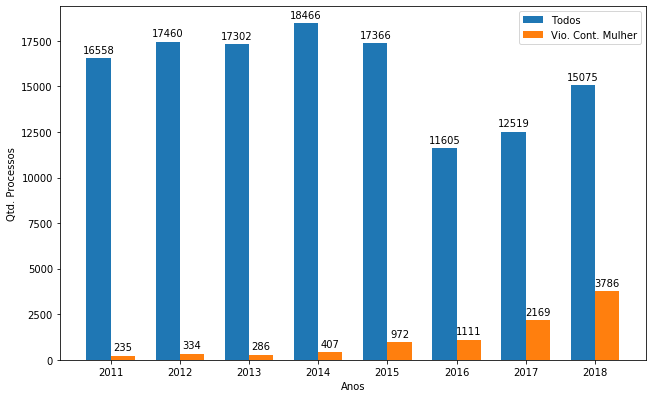

In [133]:
ind = np.arange(len(anos_frequencia['Proc_vcm']))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, anos_frequencia['Proc_ano'], width,
                label='Todos')
rects2 = ax.bar(ind + width/2, anos_frequencia['Proc_vcm'], width,
                label='Vio. Cont. Mulher')

ax.set_ylabel('Qtd. Processos'); ax.set_xticks(ind)
ax.set_xticklabels(anos_frequencia['Ano']); ax.set_xlabel('Anos'); ax.legend()
autolabel(rects1, "center", ax); autolabel(rects2, "center", ax)

fig.set_size_inches(10.5, 6.5, forward=True)
fig.savefig('figures/processos_anos', dpi=100, bbox_inches='tight')
plt.show()

In [134]:
anos_frequencia['Proc_ano'].sum()

126351

In [135]:
proporcoes = []
total_processos = anos_frequencia['Proc_ano'].sum()
for valor in anos_frequencia['Proc_vcm'].values:
    proporcoes.append(valor*100/total_processos)

In [136]:
proporcoes

[0.1859898220037831,
 0.264342981060696,
 0.22635357060885944,
 0.3221185427895307,
 0.7692855616496902,
 0.8792965627498002,
 1.7166464847923641,
 2.9964147493886077]

In [137]:
proporcoes = list(map(lambda x: float("{0:.2f}".format(x)), proporcoes))

In [138]:
proporcoes

[0.19, 0.26, 0.23, 0.32, 0.77, 0.88, 1.72, 3.0]

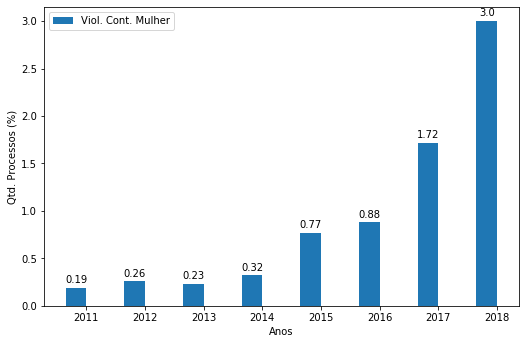

In [139]:
ind = np.arange(len(proporcoes))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, proporcoes, width,
                label='Viol. Cont. Mulher')

ax.set_ylabel('Qtd. Processos (%)'); ax.set_xticks(ind)
ax.set_xticklabels(anos_frequencia['Ano']); ax.set_xlabel('Anos'); ax.legend()
autolabel(rects1, "center", ax)

fig.set_size_inches(8.5, 5.5, forward=True)
fig.savefig('figures/frequencia_processos_anos', dpi=100, bbox_inches='tight')
plt.show()

### Analisando as Classes CNJs

In [140]:
classe_cnj = df_processos_totais['Classe CNJ']

In [141]:
classe_cnj.value_counts()

Medidas Protetivas de urgência (Lei Maria da Penha)             2838
Ação Penal - Procedimento Sumário                               2581
Medidas Protetivas de urgência (Lei Maria da Penha) Criminal    2497
Inquérito Policial                                               794
Auto de Prisão em Flagrante                                      172
Ação Penal - Procedimento Ordinário                               83
Representação Criminal/Notícia de Crime                           58
Insanidade Mental do Acusado                                      17
Incidente de Falsidade                                             4
Pedido de Quebra de Sigilo de Dados e/ou Telefônico                1
Carta Precatória Criminal                                          1
Ação Penal - Procedimento Sumaríssimo                              1
Habeas Corpus Criminal                                             1
Procedimento Investigatório Criminal (PIC-MP)                      1
Habeas Corpus                     

In [142]:
valores_classe_cnj = classe_cnj.value_counts()
title = 'Frequência das Classes CNJ'

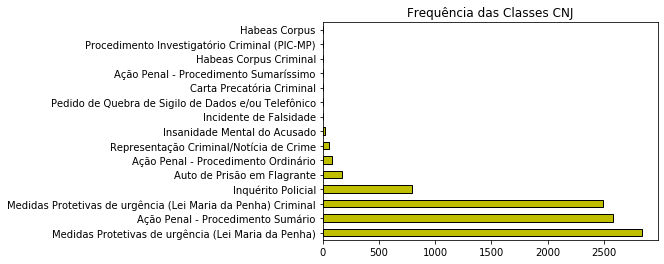

In [143]:
fig = plt.figure()
valores_classe_cnj.plot.barh(title=title, edgecolor='black', color='y')

In [144]:
valores_classe_cnj

Medidas Protetivas de urgência (Lei Maria da Penha)             2838
Ação Penal - Procedimento Sumário                               2581
Medidas Protetivas de urgência (Lei Maria da Penha) Criminal    2497
Inquérito Policial                                               794
Auto de Prisão em Flagrante                                      172
Ação Penal - Procedimento Ordinário                               83
Representação Criminal/Notícia de Crime                           58
Insanidade Mental do Acusado                                      17
Incidente de Falsidade                                             4
Pedido de Quebra de Sigilo de Dados e/ou Telefônico                1
Carta Precatória Criminal                                          1
Ação Penal - Procedimento Sumaríssimo                              1
Habeas Corpus Criminal                                             1
Procedimento Investigatório Criminal (PIC-MP)                      1
Habeas Corpus                     

In [181]:
valores = []
nomes = []
outros = []

In [182]:
cont = 0
for i, valor in enumerate(valores_classe_cnj.values):
    if valor <= 58:
        cont += valor
        outros.append(valores_classe_cnj.index[i])
    else:
        valores.append(valor)
        nomes.append(valores_classe_cnj.index[i])

valores.append(cont)
nomes.append('Outros')

In [183]:
valores_classe_filtrados =  pd.Series(valores, index=nomes)

In [184]:
valores_classe_filtrados

Medidas Protetivas de urgência (Lei Maria da Penha)             2838
Ação Penal - Procedimento Sumário                               2581
Medidas Protetivas de urgência (Lei Maria da Penha) Criminal    2497
Inquérito Policial                                               794
Auto de Prisão em Flagrante                                      172
Ação Penal - Procedimento Ordinário                               83
Outros                                                            85
dtype: int64

In [185]:
valores_classe_filtrados.index

Index(['Medidas Protetivas de urgência (Lei Maria da Penha)',
       'Ação Penal - Procedimento Sumário',
       'Medidas Protetivas de urgência (Lei Maria da Penha) Criminal',
       'Inquérito Policial', 'Auto de Prisão em Flagrante',
       'Ação Penal - Procedimento Ordinário', 'Outros'],
      dtype='object')

In [186]:
outros

['Representação Criminal/Notícia de Crime',
 'Insanidade Mental do Acusado',
 'Incidente de Falsidade',
 'Pedido de Quebra de Sigilo de Dados e/ou Telefônico',
 'Carta Precatória Criminal',
 'Ação Penal - Procedimento Sumaríssimo',
 'Habeas Corpus Criminal',
 'Procedimento Investigatório Criminal (PIC-MP)',
 'Habeas Corpus']

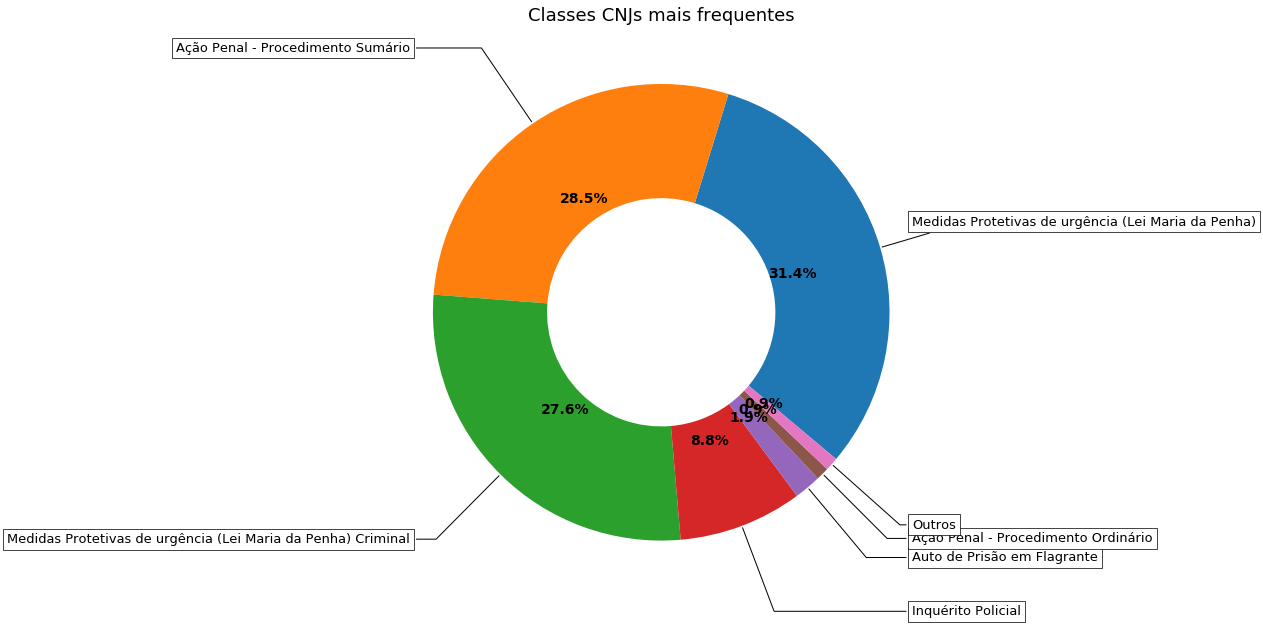

In [193]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

recipe = valores_classe_filtrados.index

data = valores_classe_filtrados.values

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=13)

plt.setp(autotexts, size=14, weight="bold")
ax.set_title("Classes CNJs mais frequentes", fontsize=18)
fig.set_size_inches(10.5, 10.5, forward=True)
fig.savefig('figures/frequencia_classes_cnjs', dpi=100, bbox_inches='tight')
plt.show()

### Analisando os Assuntos presentes nos processos

In [152]:
assuntos = df_assuntos_totais['Assunto']

In [153]:
assuntos.unique()

array(['Decorrente de Violência Doméstica', 'Ameaça', 'Difamação',
       'Injúria', 'Leve', 'Estelionato',
       'Crimes contra as Relações de Consumo', 'Violação de domicílio',
       'Roubo', 'Estupro', 'Crime Tentado', 'Calúnia',
       'Crimes Previstos no Estatuto da criança e do adolescente',
       'Desobediência', 'Estupro de Vulnerável',
       'Violência Doméstica Contra a Mulher', 'Maus Tratos', 'Gravíssima',
       'Dano', 'Furto', 'Dano Qualificado', 'Contravenções Penais',
       'Homicídio Simples', 'Constrangimento ilegal', 'Rixa', 'Grave',
       'Prevaricação', 'Exercício arbitrário das próprias razões',
       'Crimes Previstos no Estatuto do Idoso', 'Desacato',
       'Apropriação indébita', 'Fato Atípico',
       'Seqüestro e cárcere privado', 'Resistência', 'Incêndio',
       'Extorsão', 'Crimes de Tortura', 'Falsidade',
       'Homicídio Qualificado', 'Ameaça (art. 147)', 'Crimes Militares',
       'Violação sexual mediante fraude', 'Prisão Preventiva',
       

In [154]:
len(assuntos.unique())

65

In [155]:
assuntos_valor = assuntos.value_counts()

In [156]:
assuntos_valor

Ameaça                                                            5416
Violência Doméstica Contra a Mulher                               2886
Decorrente de Violência Doméstica                                 2682
Injúria                                                           1950
Contravenções Penais                                               720
Difamação                                                          243
Dano                                                               241
Leve                                                               200
Violação de domicílio                                              159
Calúnia                                                             60
Estupro                                                             60
Exercício arbitrário das próprias razões                            44
Furto                                                               29
Maus Tratos                                                         25
Crime 

In [157]:
assuntos_valor.unique()

array([5416, 2886, 2682, 1950,  720,  243,  241,  200,  159,   60,   44,
         29,   25,   23,   21,   19,   16,   13,   11,   10,    9,    8,
          7,    3,    2,    1], dtype=int64)

In [158]:
assuntos_valor = assuntos_valor.iloc[assuntos_valor.values > 9]

In [159]:
assuntos_valor

Ameaça                                                      5416
Violência Doméstica Contra a Mulher                         2886
Decorrente de Violência Doméstica                           2682
Injúria                                                     1950
Contravenções Penais                                         720
Difamação                                                    243
Dano                                                         241
Leve                                                         200
Violação de domicílio                                        159
Calúnia                                                       60
Estupro                                                       60
Exercício arbitrário das próprias razões                      44
Furto                                                         29
Maus Tratos                                                   25
Crime Tentado                                                 23
Constrangimento ilegal   

In [160]:
valores = []
nomes = []
outros = []

In [161]:
cont = 0
for i, valor in enumerate(assuntos_valor.values):
    if valor <= 150:
        cont += valor
        outros.append(assuntos_valor.index[i])
    else:
        valores.append(valor)
        nomes.append(assuntos_valor.index[i])

valores.append(cont)
nomes.append('Outros')

In [162]:
valores_assuntos_filtrados =  pd.Series(valores, index=nomes).sort_values(ascending=False)

In [163]:
valores_assuntos_filtrados

Ameaça                                 5416
Violência Doméstica Contra a Mulher    2886
Decorrente de Violência Doméstica      2682
Injúria                                1950
Contravenções Penais                    720
Outros                                  344
Difamação                               243
Dano                                    241
Leve                                    200
Violação de domicílio                   159
dtype: int64

In [164]:
outros

['Calúnia',
 'Estupro',
 'Exercício arbitrário das próprias razões',
 'Furto',
 'Maus Tratos',
 'Crime Tentado',
 'Constrangimento ilegal',
 'Seqüestro e cárcere privado',
 'Crimes Previstos no Estatuto da criança e do adolescente',
 'Homicídio Simples',
 'Apropriação indébita',
 'Desobediência',
 'Gravíssima']

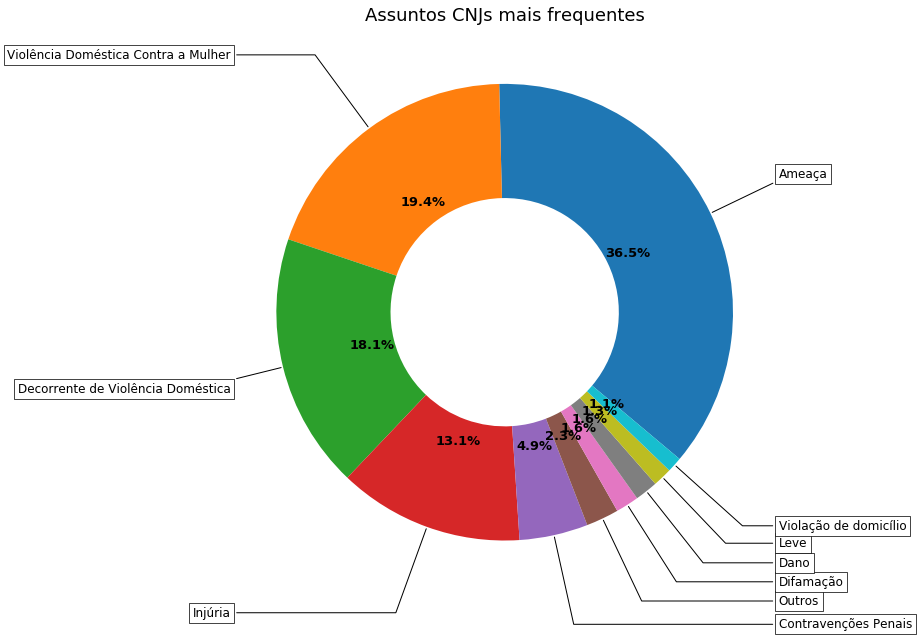

In [165]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

recipe = valores_assuntos_filtrados.index

data = valores_assuntos_filtrados.values

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=12)

plt.setp(autotexts, size=13, weight="bold")
ax.set_title("Assuntos CNJs mais frequentes", fontsize=18)
fig.set_size_inches(10.5, 10.5, forward=True)
fig.savefig('figures/frequencia_assuntos_cnjs', dpi=100, bbox_inches='tight')
plt.show()

### Analisando os andamentos

In [166]:
numero_exemplo = df_andamentos_totais['numero'].unique()[1]

In [167]:
numero_exemplo

299719620118170001

In [168]:
df_andamentos_totais[(df_andamentos_totais['numero'] == int(numero_exemplo))]

,Unnamed: 0,complemento,data,numero,texto,titulo
9,9,Defensoria Pública,15/05/2019 10:14:00,299719620118170001,NaN,Autos entregues em carga ao Defensoria Pública
10,10,NaN,16/03/2018 07:30:00,299719620118170001,NaN,Determinação de cumprimento de atos processuai...
11,11,Despacho,29/01/2016 11:08:00,299719620118170001,NaN,Conclusos Partes - Polo 1
12,12,Terceira Vara de Violência Doméstica e Familia...,18/01/2016 12:01:00,299719620118170001,NaN,Redistribuído por Prazo 7 - 1ª D - MAR/JUN/SET...
13,13,Ciente nos autos,21/12/2015 17:55:00,299719620118170001,NaN,Recebidos os autos Ciente nos autos
14,14,Ministério Público,04/11/2015 16:57:00,299719620118170001,NaN,Autos entregues em carga ao Ministério Público
15,15,NaN,04/11/2015 16:43:00,299719620118170001,NaN,Registro e Publicação de Sentença
16,16,Despacho,11/09/2015 19:18:00,299719620118170001,NaN,Conclusos Partes - Polo 1
17,17,Mandado Cumprido,11/09/2015 19:00:00,299719620118170001,NaN,Juntada de Mandado Cumprido
18,18,Outros,11/09/2015 18:57:00,299719620118170001,NaN,Juntada de Outros


In [169]:
numeros_aux = []
data_inicio_aux = []
data_fim_aux = []
duracao_aux = []

In [170]:
for numero in df_andamentos_totais['numero'].unique():
    lista = list(df_andamentos_totais[(
                 df_andamentos_totais['numero'] == int(numero))]['data'])
    lista = [datetime.strptime(lista[i], "%d/%m/%Y %H:%M:%S") for i in range(len(lista))]

    if max(lista).year != 2019:
        duracao = abs(lista[0] - lista[-1]).days

        numeros_aux.append(numero)
        data_inicio_aux.append(min(lista))
        data_fim_aux.append(max(lista))
        duracao_aux.append(duracao)

#### Duracao dos andamentos

In [171]:
duracao_andamentos = pd.DataFrame({
    'Numero': numeros_aux,
    'Data Inicio': data_inicio_aux,
    'Data Fim': data_fim_aux,
    'Duracao (em dias)': duracao_aux
})

In [172]:
duracao_andamentos

,Numero,Data Inicio,Data Fim,Duracao (em dias)
0,249799220118170001,2011-05-06 12:43:00,2013-07-29 18:45:00,815
1,249755520118170001,2011-05-06 12:40:00,2013-07-26 16:25:00,812
2,249686320118170001,2011-05-06 12:32:00,2013-07-29 18:45:00,815
3,249539420118170001,2011-05-06 12:10:00,2015-11-09 08:28:00,1647
4,249131520118170001,2011-05-06 11:04:00,2013-07-29 18:45:00,815
5,298255520118170001,2011-05-27 17:36:00,2013-08-12 17:08:00,807
6,247599420118170001,2011-05-05 16:39:00,2015-11-10 07:47:00,1649
7,298827320118170001,2011-05-30 09:05:00,2018-12-20 09:14:00,2761
8,298800620118170001,2011-05-30 09:02:00,2013-08-12 15:51:00,805
9,298749620118170001,2011-05-30 08:54:00,2013-08-01 17:56:00,794


In [173]:
duracao_andamentos['Duracao (em dias)'].describe()

count    2565.000000
mean      575.871735
std       662.314236
min         0.000000
25%        67.000000
50%       282.000000
75%       891.000000
max      2888.000000
Name: Duracao (em dias), dtype: float64